# INTRODUCTION
This guide provides a roadmap for conducting Exploratory Data Analysis (EDA) on the Aspiring Minds Employment Outcome (AMEO) 2015 dataset. The dataset focuses on engineering graduates, capturing their employment outcomes (salary, job titles, locations) alongside standardized scores in various skill areas and demographics.

Our objective is to explore the characteristics of these graduates, understand their career trajectories, and uncover potential relationships between various factors influencing their employment outcomes. Through this EDA process, we aim to identify patterns, trends, and interesting questions that warrant further investigation.

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
PATH = r'/content/drive/MyDrive/Colab Notebooks/data/data.xlsx'
amcat_df = pd.read_excel(PATH)
amcat_df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [14]:
amcat_df.drop('Unnamed: 0',axis=1, inplace=True)
amcat_df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [15]:
amcat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [16]:
amcat_df.shape

(3998, 38)

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check Columns
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column.
- Drop unnecessary columns

In [17]:
# Checking Missing Values
amcat_df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [18]:
# Checking Duplicates
amcat_df.duplicated().sum()

0

In [19]:
# Checking the columns
amcat_df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [20]:
# checking the datatypes
amcat_df.dtypes

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


In [21]:
# Check the number of unique values in each columns
amcat_df.nunique()

ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg                  23
conscienti

In [22]:
# Check the statistics of datasets
amcat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3998.0,663794.540520,363218.245829,11244.0000,334284.250000,639600.000000,990480.000000,1.298275e+06
Salary,3998.0,307699.849925,212737.499957,35000.0000,180000.000000,300000.000000,370000.000000,4.000000e+06
10percentage,3998.0,77.925443,9.850162,43.0000,71.680000,79.150000,85.670000,9.776000e+01
12graduation,3998.0,2008.087544,1.653599,1995.0000,2007.000000,2008.000000,2009.000000,2.013000e+03
12percentage,3998.0,74.466366,10.999933,40.0000,66.000000,74.400000,82.600000,9.870000e+01
CollegeID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeTier,3998.0,1.925713,0.262270,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,3998.0,71.486171,8.167338,6.4500,66.407500,71.720000,76.327500,9.993000e+01
CollegeCityID,3998.0,5156.851426,4802.261482,2.0000,494.000000,3879.000000,8818.000000,1.840900e+04
CollegeCityTier,3998.0,0.300400,0.458489,0.0000,0.000000,0.000000,1.000000,1.000000e+00


In [31]:
# Drop unnecessary columns
# amcat_df = amcat_df.drop(columns=['ID','CollegeID','CollegeCityID'])
amcat_df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [32]:
# Check various categories present in the different categorical column
# define numerical and catagorical columns
numerical_columns= [feature for feature in amcat_df.columns if amcat_df[feature].dtypes != 'O']
categorical_columns = [feature for feature in amcat_df.columns if amcat_df[feature].dtypes =='O']
print(f"Number of numerical columns are {len(numerical_columns)}.")
print(f"Number of categorical columns are {len(categorical_columns)}.")

Number of numerical columns are 26.
Number of categorical columns are 9.


### Exploring Data ( Visualization )
- Visualize average score distribution to make some conclusion using various plots like Histogram or Kernel Distribution Function (KDE).

## Univariate Analysis

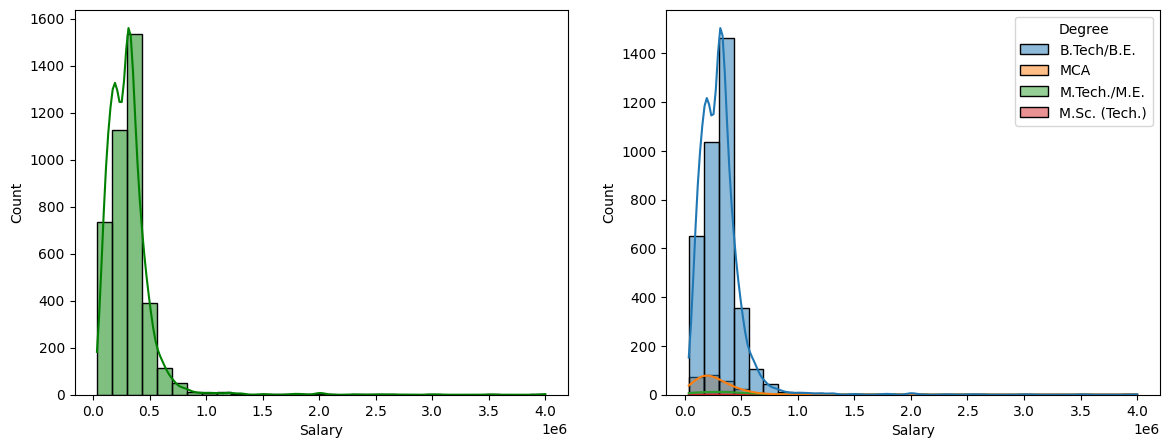

In [33]:
fig, axs = plt.subplots(1,2, figsize=(14, 5))
plt.subplot(121)
sns.histplot(data=amcat_df, x='Salary',bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=amcat_df, x='Salary',bins=30, kde=True, hue='Degree')

plt.show()

#### Insights
- B.Tech students has a higher salary other Degree persons.

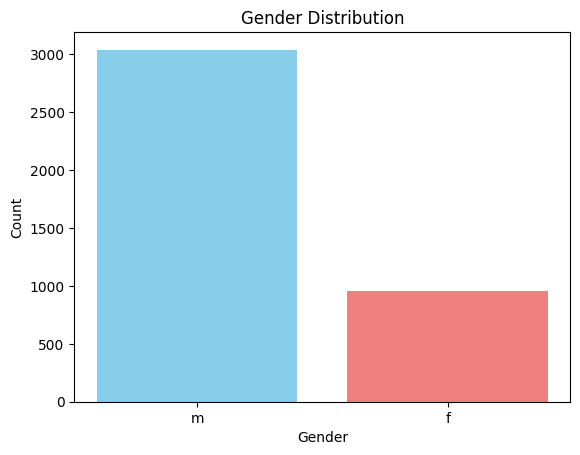

m    3041
f     957
Name: Gender, dtype: int64


In [34]:
colors = ['skyblue', 'lightcoral']
plt.bar(amcat_df['Gender'].value_counts().index, amcat_df['Gender'].value_counts().values, color=colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()
print(amcat_df['Gender'].value_counts())

#### Insights
- The ratio of m/f is 3.19 indicates there are 3 times more men than women employed.

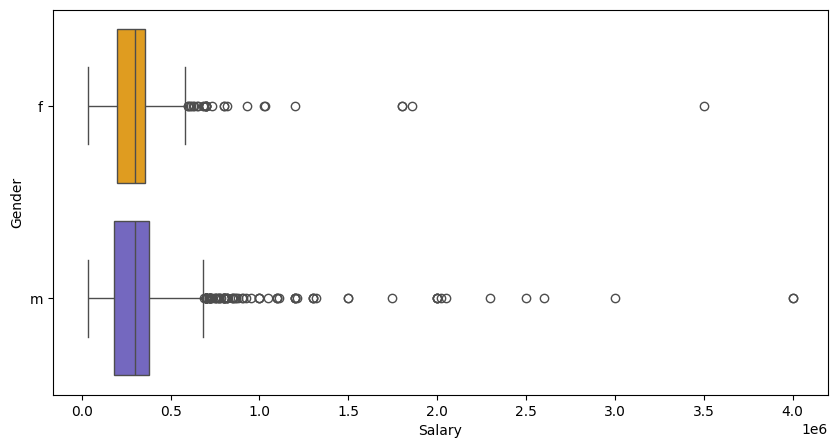

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Salary',y='Gender',data=amcat_df, palette=['orange','slateblue'])
plt.show()




#### Insights
- It is observed that there are many outliers in the salary column.
- There is not much difference between median salary for both genders.
- We can also observe male have more outliers indicating that male are earning more than female.

In [36]:
amcat_df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

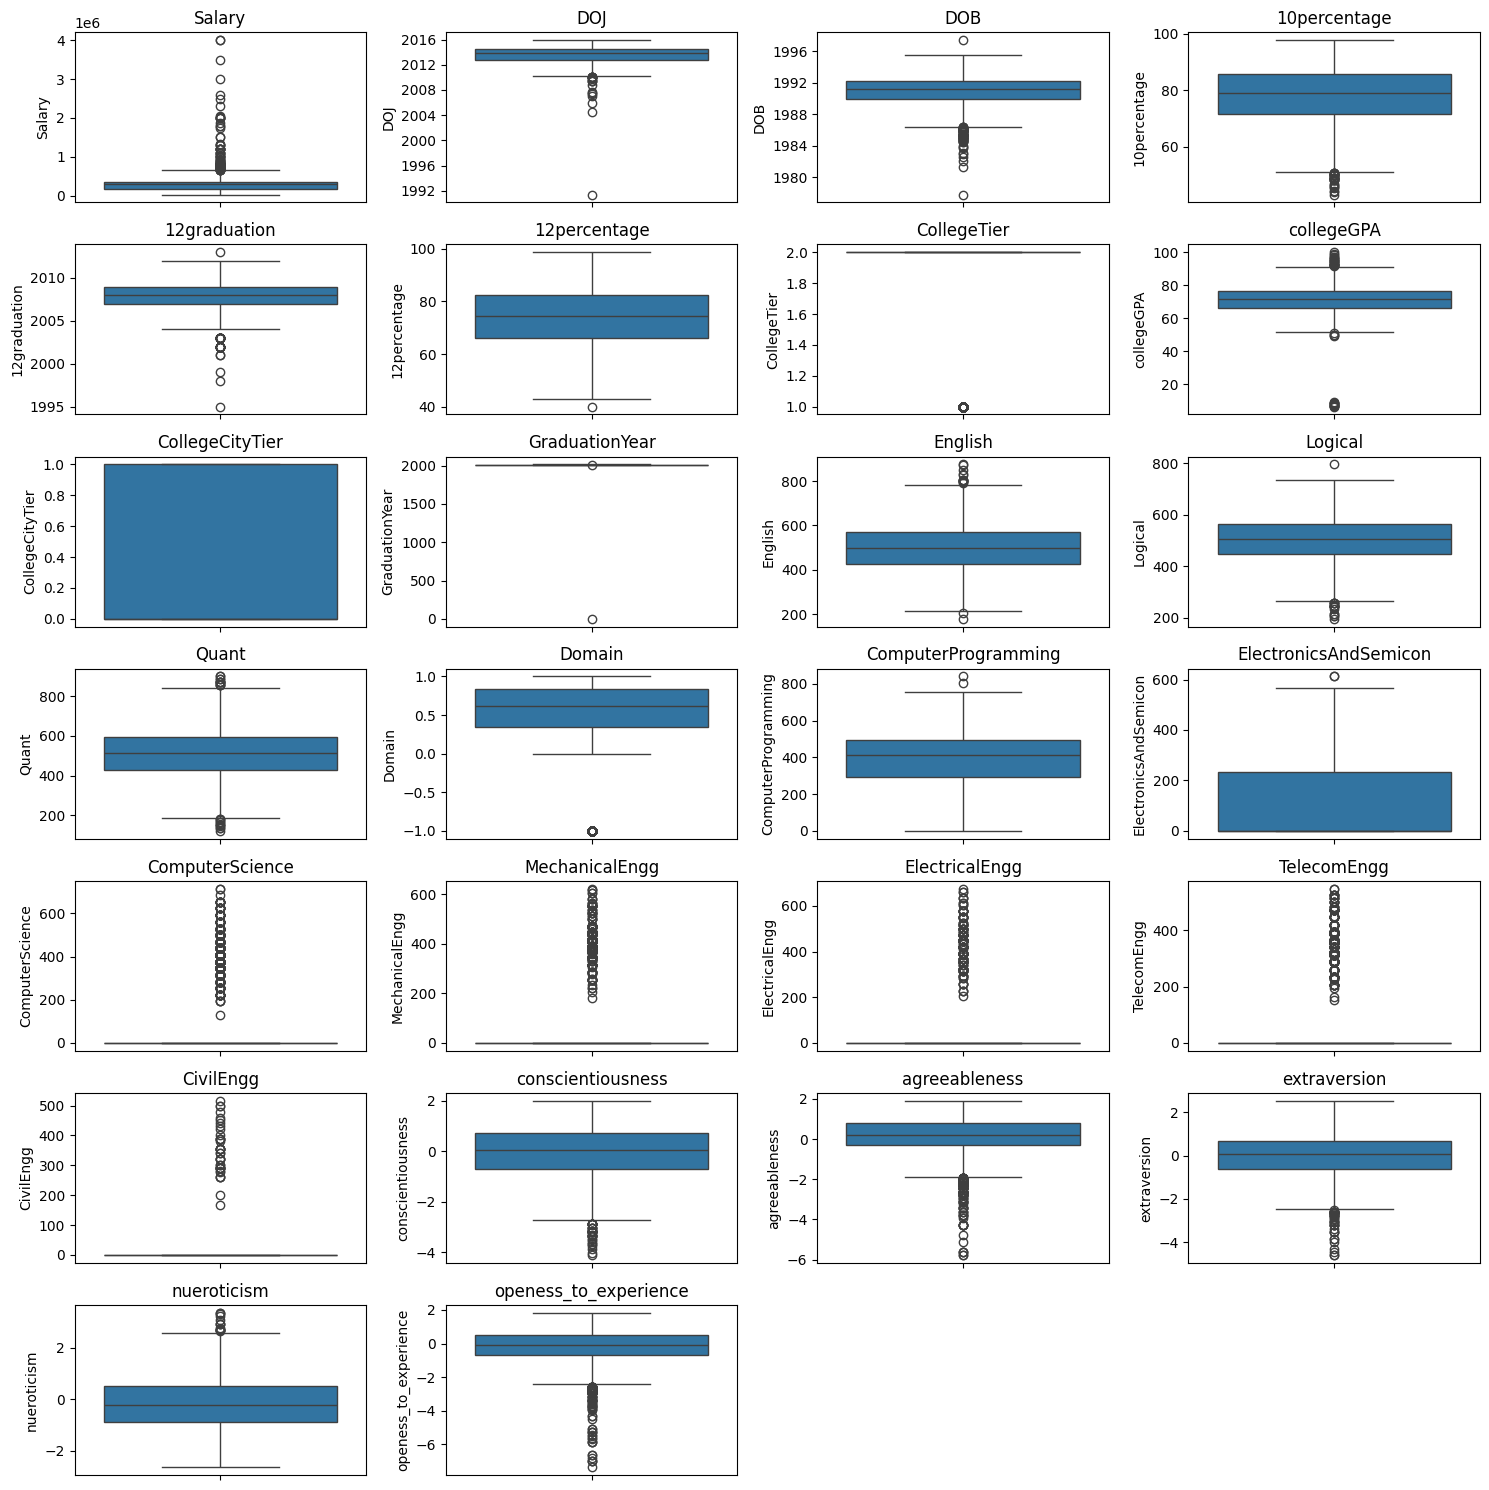

In [39]:
# List of numerical columns
numerical_columns = numerical_columns
# Define the number of rows and columns for subplots
num_rows = 7  # Adjust as needed
num_cols = 4  # Adjust as needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over numerical columns and create boxplots
for i, num_col in enumerate(numerical_columns):
    sns.boxplot(data=amcat_df[num_col], ax=axes[i])
    axes[i].set_title(num_col)

# Remove empty subplots if there are fewer numerical columns than total subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

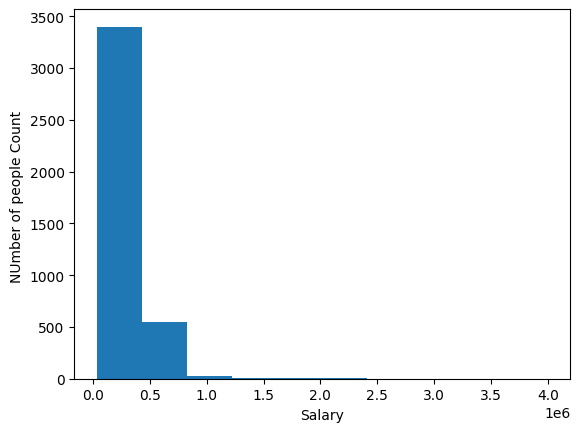

In [41]:
#calculate the tick position and labels
interval =20000
ticket_positions =np.arange(amcat_df['Salary'].min(),amcat_df['Salary'].max()+interval, interval)
ticket_label =[f'{x/100000:.0f}k' for x in ticket_positions]

# plot the histogram to
plt.hist(amcat_df['Salary'])
# plt.xticks(ticket_positions, ticket_label)
plt.ylabel("NUmber of people Count ")
plt.xlabel("Salary")
plt.show()

1. Salary Distribution: Analyze the distribution of salaries to understand the range, mean, median, and variability. Look for any outliers or patterns.

In [42]:
data = amcat_df.copy()
print(f"Salary range is {data['Salary'].min(), data['Salary'].max()}")
print(f"Average salary is (use mean){data['Salary'].mean():.2f}")
print(f"Average salary is (use median){data['Salary'].median()}")

Salary range is (35000, 4000000)
Average salary is (use mean)307699.85
Average salary is (use median)300000.0


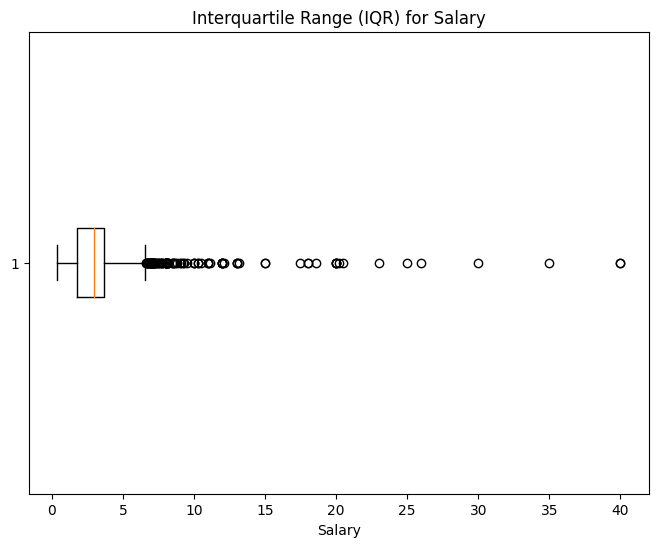

In [45]:
# Filter the 'Salary' column within the specified range
# salary_filtered = data[(data['Salary'] >= 35000) & (data['Salary'] <= 4000000)]['Salary']/100000

# Create a box plot for the filtered 'Salary' column
plt.figure(figsize=(8, 6))
plt.boxplot(data['Salary']/100000, vert=False)
plt.xlabel('Salary')
plt.title('Interquartile Range (IQR) for Salary')
plt.show()

#### Insights
- Most of the people salaries lies between 0 to 10.
- Very few people has high package between 20 to 40.

2. Joining and Leaving Patterns:
- Explore the 'DOJ' (Date of Joining) and 'DOL' (Date of Leaving) columns to identify patterns in employee tenure.
- Calculate the average tenure and look for trends over time.

datetime64[ns]
object
datetime64[ns]
datetime64[ns]


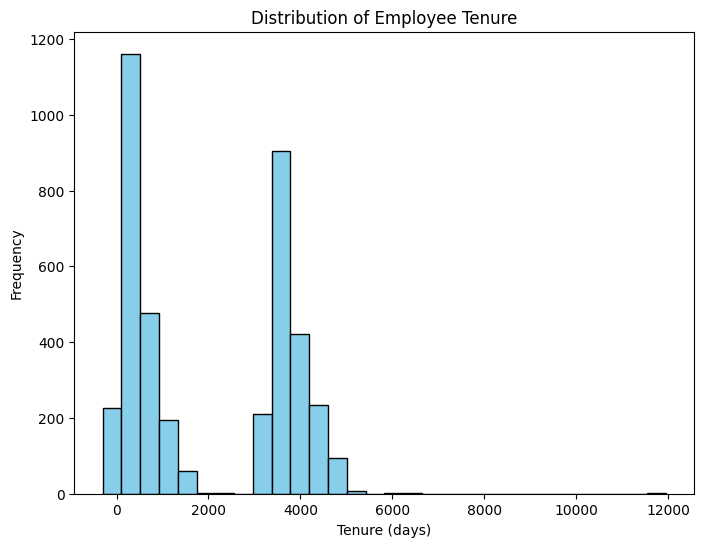

In [46]:
# Convert the 'DOJ' and 'DOL' columns to datetime format
print(data['DOJ'].dtype)
print(data['DOL'].dtype)
# change the data1 type
data['DOJ'] = pd.to_datetime(data['DOJ'],format='%m/%d/%Y %I:%M:%S %p')
#1st time show error because in data1 is present object so we change it
# Now date
data['DOL']= data['DOL'].replace('present',pd.to_datetime('today'))
data['DOL'] = pd.to_datetime(data['DOL'])

print(data['DOJ'].dtype)
print(data['DOL'].dtype)

# print(data1[['DOJ','DOL']])
data['Tenure'] = (data['DOL']- data['DOJ']).dt.days
# print(data1['Tenure'])

# Calculate tenure for employees still with the company (up to current date)
current_date = pd.to_datetime('today')
data.loc[data['DOL'].isna(), 'Tenure'] = (current_date - data['DOJ']).dt.days

# Explore tenure distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Tenure'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Tenure (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Tenure')
plt.show()

Mean Tenure: 2025.48 days
Median Tenure: 1157.50 days
Mode Tenure: 365.00 days


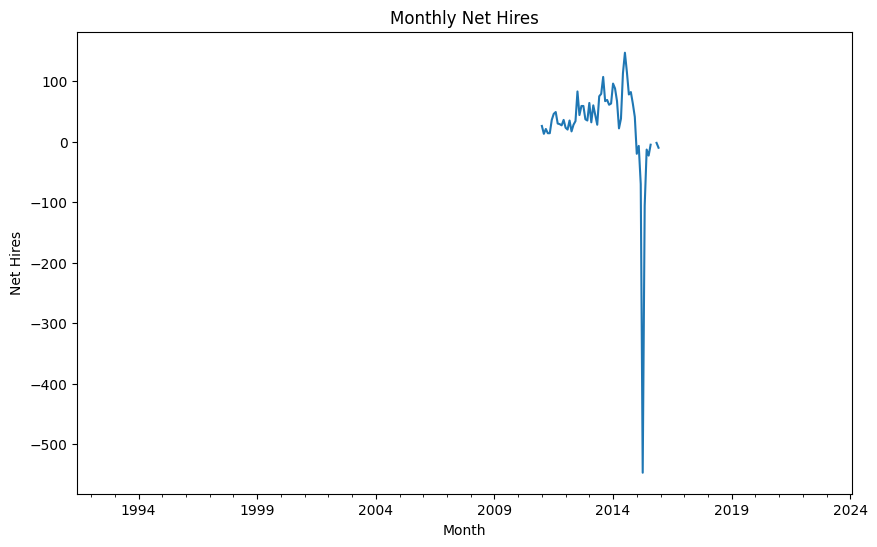

Attrition Rate: 100.00%


In [48]:
# Calculate summary statistics
mean_tenure = data['Tenure'].mean()
median_tenure = data['Tenure'].median()
mode_tenure = data['Tenure'].mode()[0]
print(f"Mean Tenure: {mean_tenure:.2f} days")
print(f"Median Tenure: {median_tenure:.2f} days")
print(f"Mode Tenure: {mode_tenure:.2f} days")

# Analyze trends over time
monthly_hires = data['DOJ'].dt.to_period('M').value_counts().sort_index()
monthly_exits = data['DOL'].dt.to_period('M').value_counts().sort_index()
monthly_net_hires = monthly_hires - monthly_exits
monthly_net_hires.plot(kind='line', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Net Hires')
plt.title('Monthly Net Hires')
plt.show()

# Calculate attrition rate
total_employees = len(data)
total_exits = len(data.dropna(subset=['DOL']))
attrition_rate = (total_exits / total_employees) * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")

3. Designation Distribution: Investigate the distribution of job titles ('Designation') to understand the hierarchy and structure of the organization.

Top 10 Most Common Job Titles:
software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
Name: Designation, dtype: int64


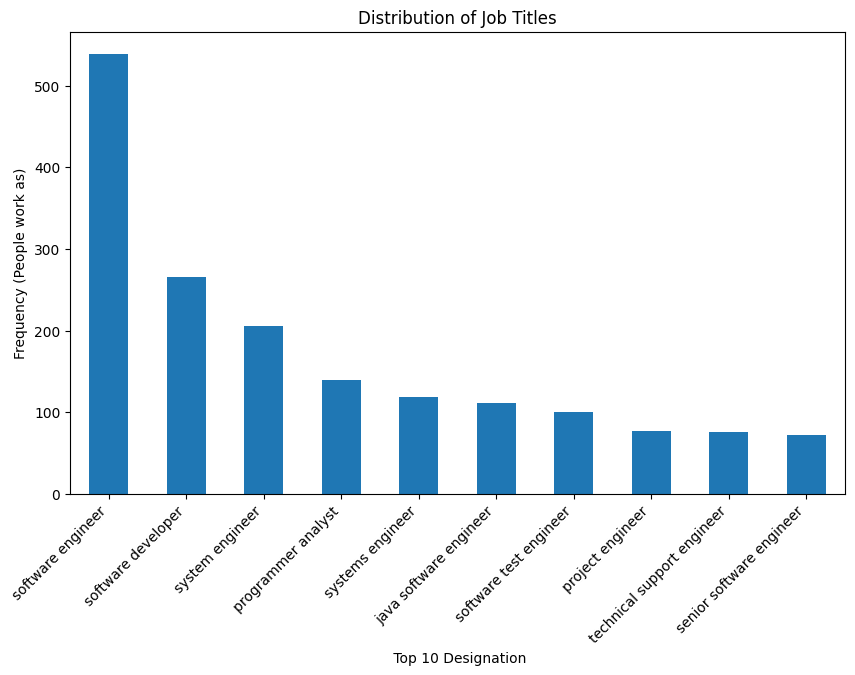

In [49]:
# Count the frequency of each job title
designation_counts = data['Designation'].value_counts()

# Print the top 10 most common job titles
print("Top 10 Most Common Job Titles:")
print(designation_counts.head(10))

# Plot the distribution of job titles
plt.figure(figsize=(10, 6))
designation_counts[:10].plot(kind='bar')
plt.xlabel(' Top 10 Designation')
plt.ylabel('Frequency (People work as)')
plt.title('Distribution of Job Titles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# New Section

4. Gender Distribution: Examine the distribution of employees by gender ('Gender') to understand gender diversity within the organization.

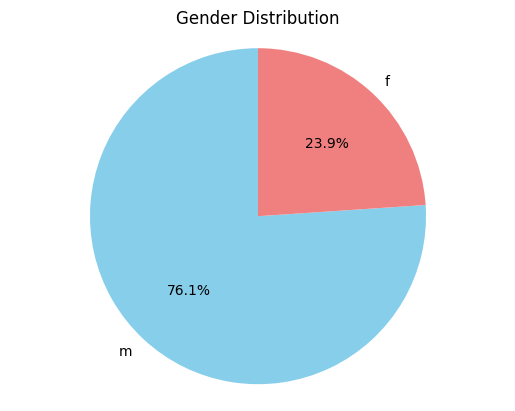

In [50]:
# Get gender counts
gender_counts = data['Gender'].value_counts()

# Define colors (replace with desired colors)
colors = ['skyblue', 'lightcoral']

# Create the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()

5. Educational Background:
Analyze '10percentage' and '12percentage' to understand the academic performance of employees in high school.
Explore 'Degree' and 'Specialization' to understand the educational background of employees.
Investigate 'CollegeTier' to understand the quality of colleges attended by employees.

Summary statistics for high school academic performance:
       10percentage  12percentage
count   3998.000000   3998.000000
mean      77.925443     74.466366
std        9.850162     10.999933
min       43.000000     40.000000
25%       71.680000     66.000000
50%       79.150000     74.400000
75%       85.670000     82.600000
max       97.760000     98.700000

Distribution of educational degrees:
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

Distribution of specializations:
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                    

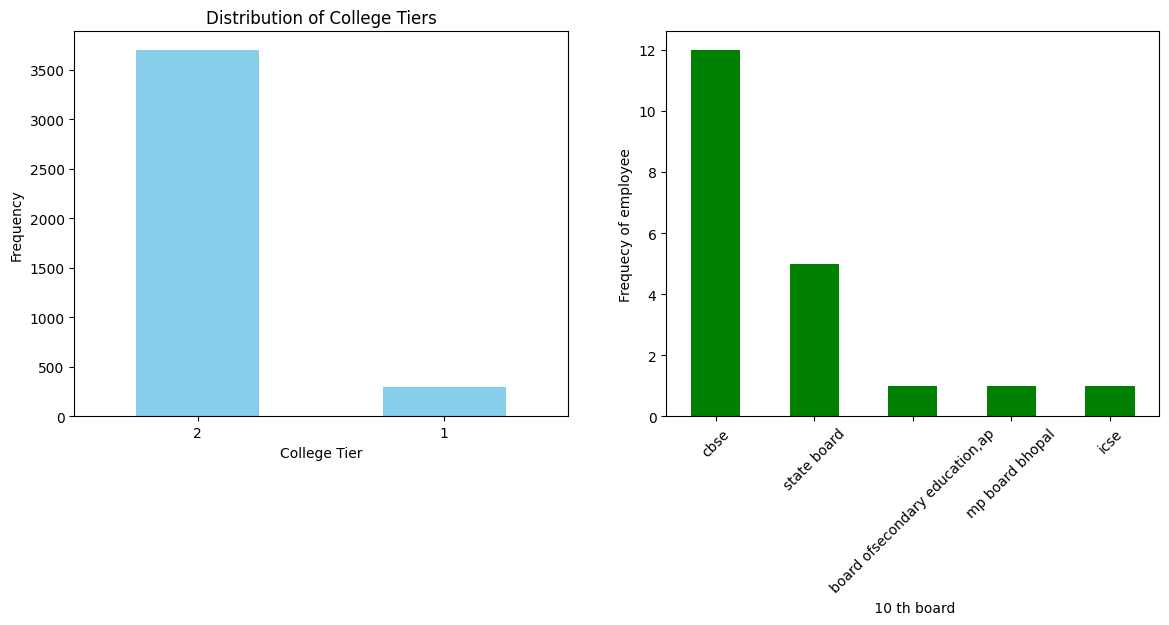

In [51]:
# Analyze high school academic performance
high_school_performance = data[['10percentage', '12percentage']]
print("Summary statistics for high school academic performance:")
print(high_school_performance.describe())

# Explore educational qualifications
degree_counts = data['Degree'].value_counts()
print("\nDistribution of educational degrees:")
print(degree_counts)

# Analyze field of study/specialization
specialization_counts = data['Specialization'].value_counts()
print("\nDistribution of specializations:")
print(specialization_counts)

# Investigate college quality
college_tier_counts = data['CollegeTier'].value_counts()
print("\nDistribution of college tiers:")
print(college_tier_counts)

# Plotting college tier distribution
fig, axs =plt.subplots(1,3, figsize=(14,5))
plt.subplot(121)
college_tier_counts.plot(kind='bar', color='skyblue')
plt.xlabel('College Tier')
plt.ylabel('Frequency')
plt.title('Distribution of College Tiers')
plt.xticks(rotation=0)

board10th =data['10board'][:20].value_counts()
plt.subplot(122)
board10th.plot(kind='bar',color='green')
plt.xlabel(' 10 th board')
plt.ylabel("Frequecy of employee")
plt.xticks(rotation =45)

plt.show()

5. AGE analysis

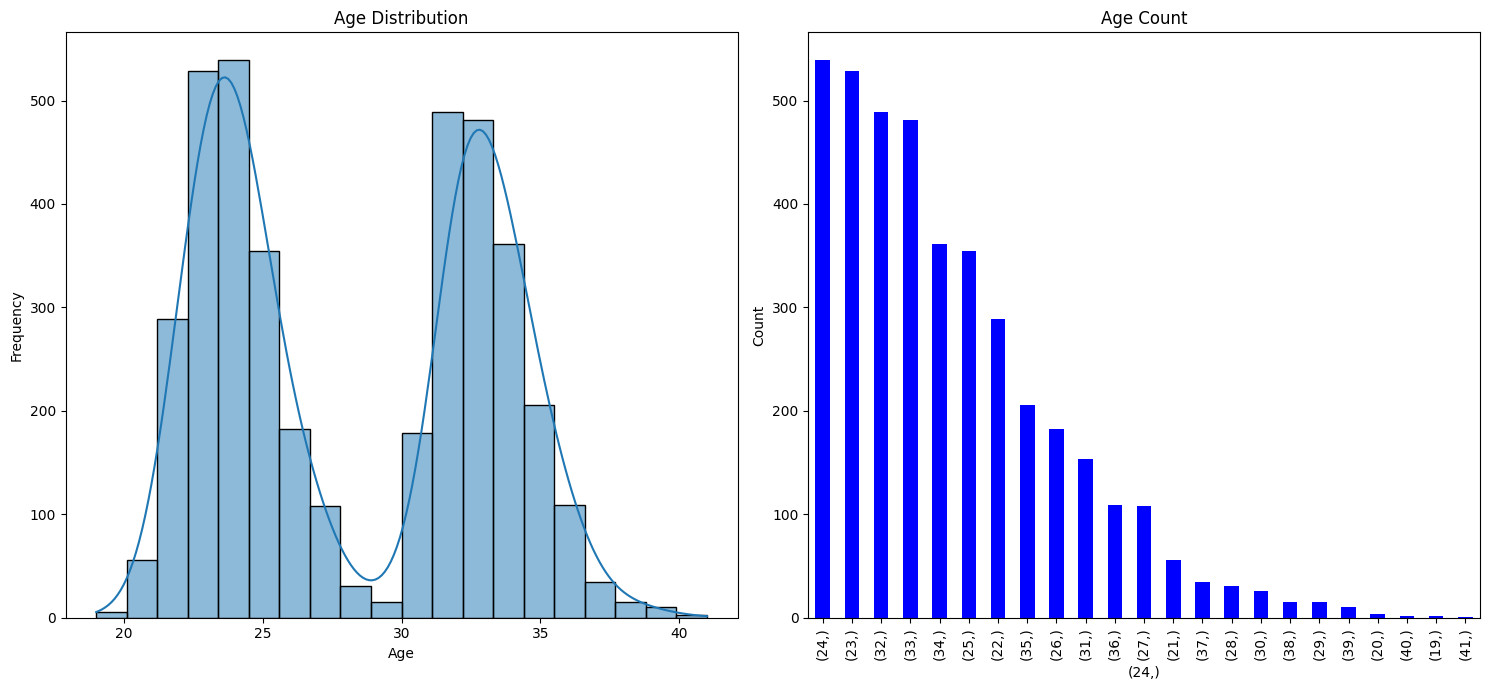

In [53]:
# Calculate age
data['age'] = pd.to_datetime(data['DOB'], format='%m/%d/%Y %I:%M:%S %p')
age = data['DOL'].dt.year - data['age'].dt.year

# Create the plots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Subplot 1: Distribution
sns.histplot(data=data, x=age, kde=True, ax=axs[0])  # Pass the axis object
axs[0].set_xlabel('Age')  # Set x-axis label explicitly
axs[0].set_ylabel('Frequency')
axs[0].set_title('Age Distribution')

# Subplot 2: Age count bar chart
age_count = pd.DataFrame(age).value_counts()
age_count.plot(kind='bar', color='blue', ax=axs[1])  # Pass the axis object
axs[1].set_xlabel(f'{age_count.index[0]}')  # Set x-axis label based on first index
axs[1].set_ylabel('Count')
axs[1].set_title('Age Count')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

7. JOB city
where job location is more employee of less emplyee work

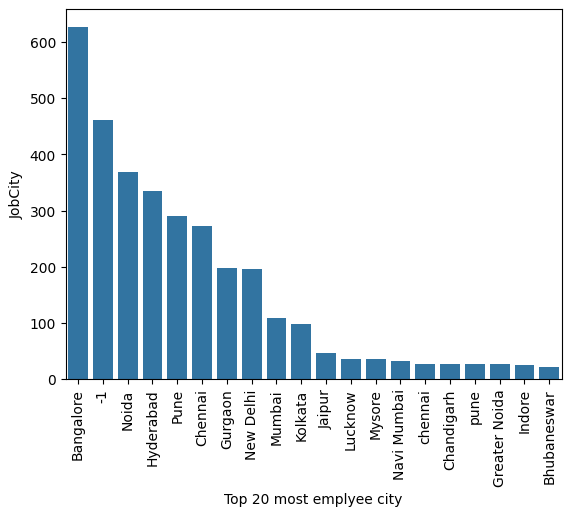

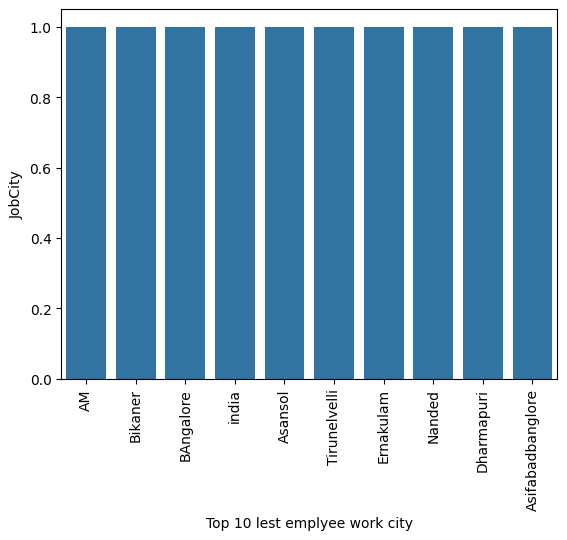

In [54]:
jobcity_count = data['JobCity'].value_counts()
sns.barplot(jobcity_count[:20])
plt.xticks(rotation=90)
plt.xlabel("Top 20 most emplyee city")
plt.show()
jobcity_count = data['JobCity'].value_counts()
sns.barplot(jobcity_count[len(jobcity_count)-10:len(jobcity_count)])
plt.xticks(rotation=90)
plt.xlabel("Top 10 least emplyee work city")
plt.show()

7. Geographical Distribution:

- Analyze 'JobCity', 'CollegeCity', and 'CollegeState' to understand the geographical distribution of employees and colleges.

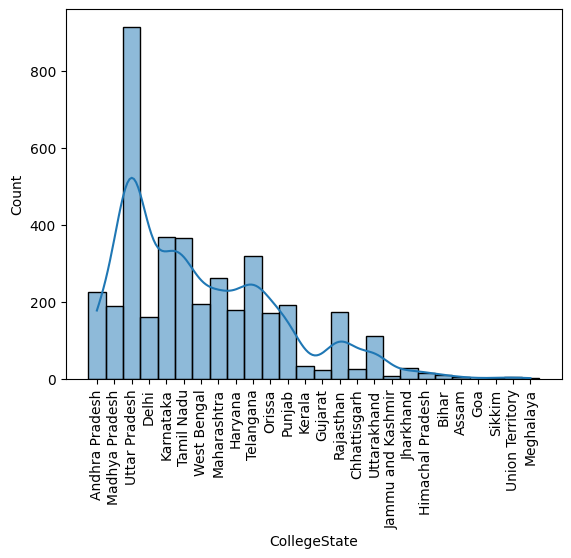

In [55]:
# Check college state
sns.histplot(data= data, x="CollegeState", kde=True)
plt.xticks(rotation=90)
plt.show()

## Bivariate Analysis:
- Bivariate analysis focuses on analyzing the relationship between two variables.

#### 1. Salary vs. Education:
- Explore the relationship between salary and
educational qualifications (10th percentage, 12th percentage, college GPA) using scatter plots or box plots.

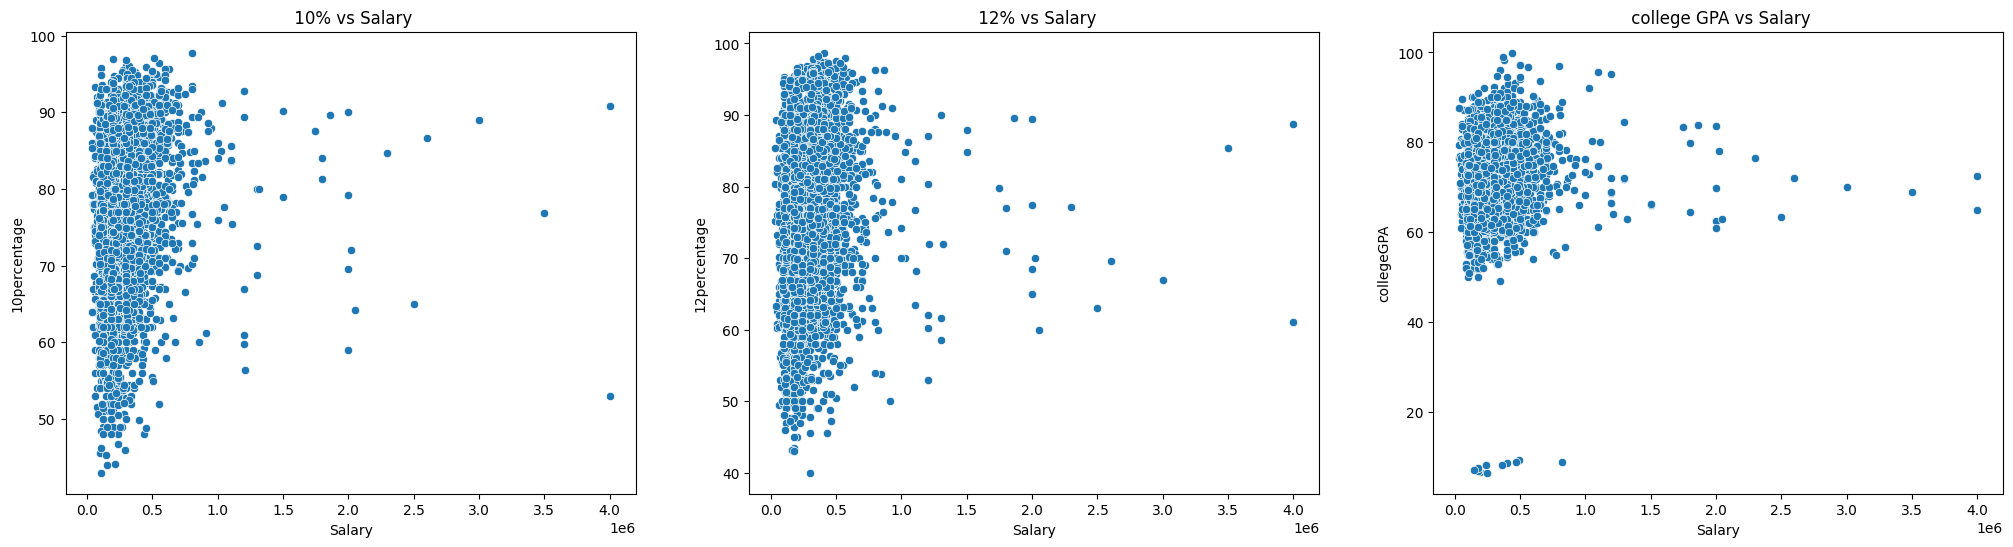

In [56]:
# salary vs Education

plt.subplots(1,3, figsize=(25,6))

plt.subplot(131)
plt.title(" 10% vs Salary")
sns.scatterplot(x=data['Salary'],y=data['10percentage'],data=data)

plt.subplot(132)
plt.title(" 12% vs Salary")
sns.scatterplot(x=data['Salary'], y=data['12percentage'], data=data)

plt.subplot(133)
plt.title(" college GPA vs Salary")
sns.scatterplot(x=data['Salary'], y=data['collegeGPA'],data=data)
plt.show()

#### 2. Salary vs. Skills and Aptitude:
- Analyze the relationship between salary and skills/aptitude scores (English, Logical, Quantitative, Domain) using scatter plots or correlation analysis.

In [57]:
data['total'] =data['English']+data['Logical']+data['Quant']
data['total'].head()

0    1625
1    2085
2    1530
3    1845
4    1635
Name: total, dtype: int64

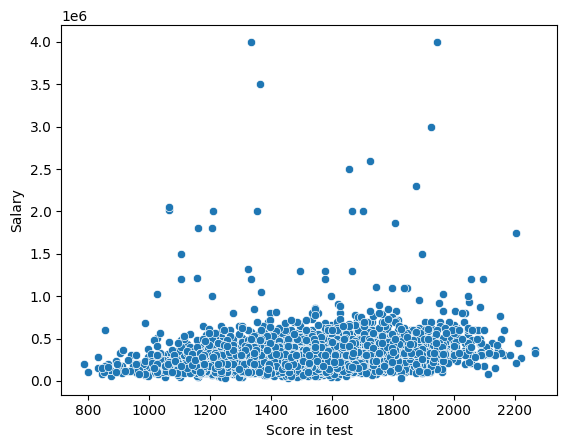

In [58]:
# salary vs Total test Score
sns.scatterplot(x=data['total'], y=data['Salary'],data=data)
plt.xlabel('Score in test')

plt.show()

####3. Salary vs. Gender:
- Compare salary distributions for different genders using box plots or violin plots to identify any gender-based salary disparities.

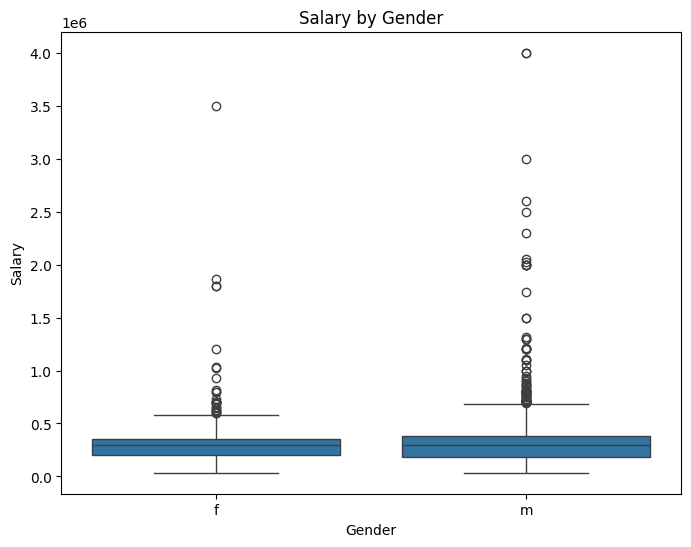

In [59]:
# Box plot between Salary and Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

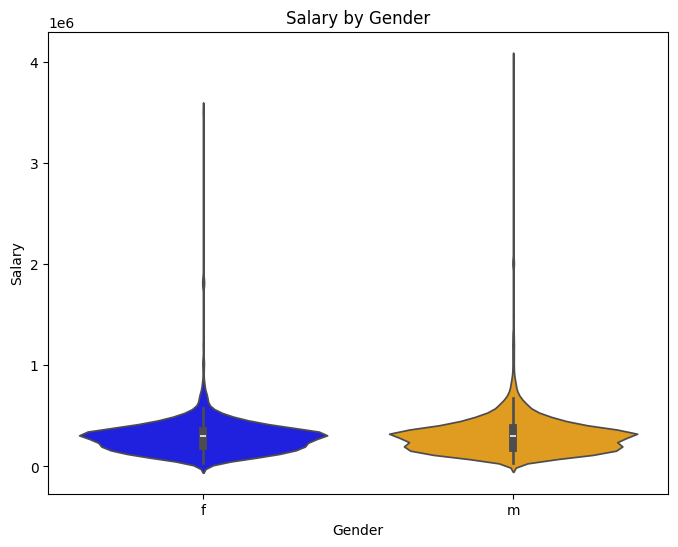

In [61]:
# Violin plot between Salary and Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Salary', data=data, palette=['blue','orange'])
plt.title('Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

#### 5. JobCity vs. Salary:
- Explore the relationship between job location ('JobCity') and salary to identify high-paying locations.

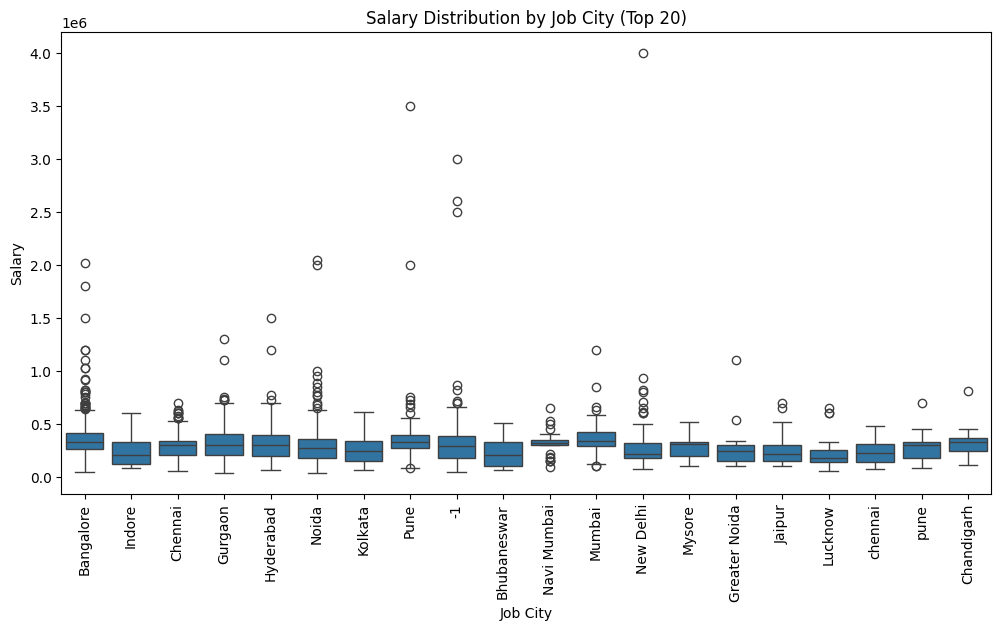

In [63]:
# Calculate the count of values for each job city
jobcity_counts = data['JobCity'].value_counts().reset_index()

# Rename the columns for clarity
jobcity_counts.columns = ['JobCity', 'Count']

# Select the top 20 job cities
top_20_jobcities = jobcity_counts.head(20)['JobCity']

# Filter the data to include only the top 20 job cities
data_top_20_jobcities = data[data['JobCity'].isin(top_20_jobcities)]

# Plot box plot of salary vs. job city for top 20 job cities
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobCity', y='Salary', data=data_top_20_jobcities)
plt.title('Salary Distribution by Job City (Top 20)')
plt.xlabel('Job City')
plt.ylabel('Salary')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#### 6. Degree vs. College Tier:
- Analyze the relationship between the degree obtained and the tier of the college attended using cross-tabulation or stacked bar plots.

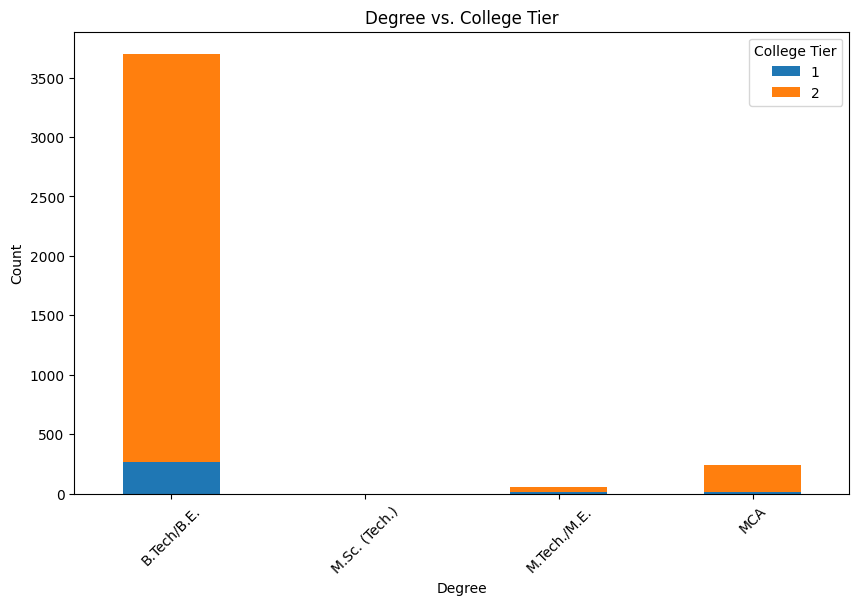

In [64]:
# Create a DataFrame containing the count of each combination of Degree and CollegeTier
degree_collegetier_counts = data.groupby(['Degree', 'CollegeTier']).size().unstack(fill_value=0)

# Plot the stacked bar plot
degree_collegetier_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Degree vs. College Tier')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='College Tier')
plt.show()

### **Research Questions**
#### Question 1.
####1(a).
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [69]:
# Calculate the difference in years between 'DOL' and 'DOJ'
data['Experience'] = data['DOL'].dt.year - data['DOJ'].dt.year

# Handle potential errors (e.g., negative experience)
data['Experience'] = data['Experience'].where(data['Experience'] >= 0, 0)

# Print or use the 'Experience' column for further analysis
print(data['Experience'])

0       12
1       11
2       10
3       13
4        1
        ..
3993     1
3994     0
3995    11
3996     1
3997    11
Name: Experience, Length: 3998, dtype: int64


Specialization
aeronautical engineering                       120000.000000
applied electronics and instrumentation        271250.000000
automobile/automotive engineering              110000.000000
biotechnology                                  208750.000000
ceramic engineering                            335000.000000
chemical engineering                           312500.000000
civil engineering                              305714.285714
computer application                           248111.111111
computer engineering                           253884.615385
computer science                               290000.000000
computer science & engineering                 230312.500000
computer science and technology                208750.000000
electrical and power engineering               210000.000000
electrical engineering                         199482.758621
electronics                                     40000.000000
electronics & instrumentation eng              236666.666667
electroni

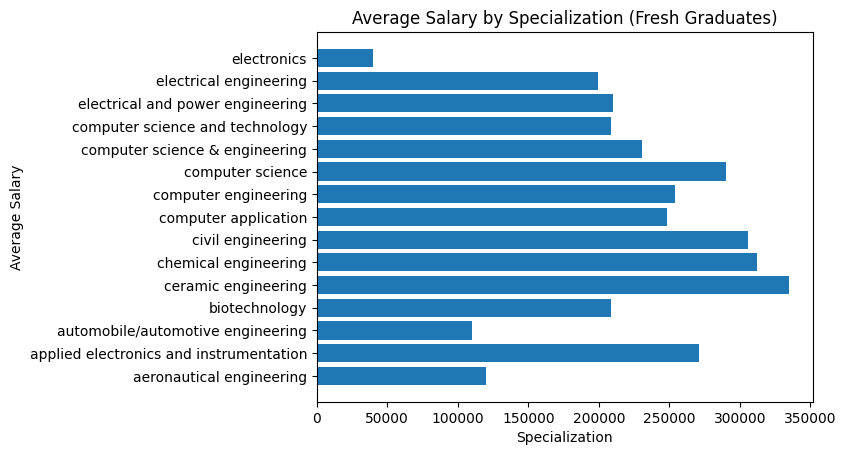

In [74]:
# Filter for fresh graduates (replace with your criteria)
fresh_grads = data[data['Experience'] <= 1]  # Assuming 'Experience' indicates years of experience

# Average salary per specialization
avg_salary_spec = fresh_grads.groupby('Specialization')['Salary'].mean()

# Print or visualize average salaries (e.g., bar chart)
print(avg_salary_spec)
avg_salary_spec = avg_salary_spec.head(15)

plt.barh(avg_salary_spec.index, avg_salary_spec.values)
plt.xlabel('Specialization')
plt.ylabel('Average Salary')
plt.title('Average Salary by Specialization (Fresh Graduates)')
plt.show()

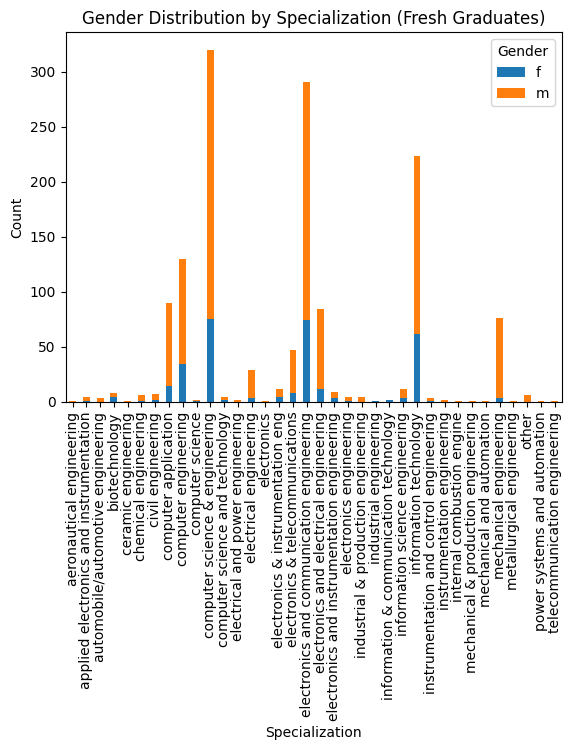

Gender                                                f           m
Specialization                                                     
aeronautical engineering                       0.000000  100.000000
applied electronics and instrumentation       25.000000   75.000000
automobile/automotive engineering              0.000000  100.000000
biotechnology                                 50.000000   50.000000
ceramic engineering                            0.000000  100.000000
chemical engineering                          16.666667   83.333333
civil engineering                             28.571429   71.428571
computer application                          15.555556   84.444444
computer engineering                          26.153846   73.846154
computer science                              50.000000   50.000000
computer science & engineering                23.437500   76.562500
computer science and technology               50.000000   50.000000
electrical and power engineering               0

In [75]:
# Gender distribution within each specialization
gender_distribution = fresh_grads.groupby(['Specialization', 'Gender']).size().unstack().fillna(0)

# Visualize distribution (stacked bar chart or normalized percentages)
gender_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Gender Distribution by Specialization (Fresh Graduates)')
plt.legend(title='Gender')
plt.show()

# Calculate and compare proportions (optional)
gender_prop = gender_distribution.div(gender_distribution.sum(axis=1), axis=0) * 100
print(gender_prop)

# EDA HELP PART
For the given dataset columns, here are some insights you can derive through Exploratory Data Analysis (EDA):

- Salary Distribution: Analyze the distribution of salaries to understand the range, mean, median, and variability. Look for any outliers or patterns.

- Joining and Leaving Patterns: Explore the 'DOJ' (Date of Joining) and 'DOL' (Date of Leaving) columns to identify patterns in employee tenure. Calculate the average tenure and look for trends over time.

- Designation Distribution: Investigate the distribution of job titles ('Designation') to understand the hierarchy and structure of the organization.

- Gender Distribution: Examine the distribution of employees by gender ('Gender') to understand gender diversity within the organization.

- Educational Background:

Analyze '10percentage' and '12percentage' to understand the academic performance of employees in high school.

- Explore 'Degree' and 'Specialization' to understand the educational background of employees.
Investigate 'CollegeTier' to understand the quality of colleges attended by employees.

- Skills and Aptitude:
Analyze scores in English, Logical, and Quantitative aptitude tests to understand the aptitude of employees.
Explore domain knowledge ('Domain') and computer programming skills to assess skill levels.

- Personality Traits:
Investigate personality traits such as conscientiousness, agreeableness, extraversion, neuroticism, and openness to experience to understand employee traits and potential correlations with job performance.

- Engineering Background:
Explore the presence and distribution of employees with engineering backgrounds in specific fields such as Computer Science, Electronics, Mechanical, Electrical, Telecom, and Civil Engineering.

- Geographical Distribution:
Analyze 'JobCity', 'CollegeCity', and 'CollegeState' to understand the geographical distribution of employees and colleges.
By performing EDA on these aspects of the dataset, you can gain insights into various facets of the organization, including employee demographics, skills, education, and tenure patterns, which can inform decision-making processes such as hiring strategies, talent development initiatives, and organizational planning.

## Bivariate Analysis:
Bivariate analysis focuses on analyzing the relationship between two variables.

- Salary vs. Education:
Explore the relationship between salary and educational qualifications (10th percentage, 12th percentage, college GPA) using scatter plots or box plots.

- Salary vs. Skills and Aptitude:
Analyze the relationship between salary and skills/aptitude scores (English, Logical, Quantitative, Domain) using scatter plots or correlation analysis.

- Salary vs. Gender:
Compare salary distributions for different genders using box plots or violin plots to identify any gender-based salary disparities.

- Salary vs. Personality Traits:
Investigate the relationship between salary and personality traits using scatter plots or correlation analysis to understand if certain traits correlate with higher salaries.

- JobCity vs. Salary:
Explore the relationship between job location ('JobCity') and salary to identify high-paying locations.

- Degree vs. College Tier:
Analyze the relationship between the degree obtained and the tier of the college attended using cross-tabulation or stacked bar plots.